This nodebook is created to use regression model on Medical Insurance dataset\
Author Name: Sania Siddiqui\
Date Created: 1st April 2025

## About Data
Predict medical costs for over 1300 individuals, based on attributes such as age, gender, BMI, how many children they have, if they are a smoker or not, and which region in the US they live\
Feature: age,sex,BMI,children,smoker,region\
Target: charge


In [45]:
# Import libraries
#Libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import stats library
from scipy import stats as st
# Libraries for data preprocessing 
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    BaggingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# Libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score


# Libraries for removing warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Load Dataset
df=pd.read_csv(r'C:\Users\sania.siddiqui\Downloads/insurance.csv')

In [47]:
# Read dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
df.shape

(1338, 7)

In [51]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [52]:
# Identify unique values
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


In [53]:
# Check value counts of continous variables
df.select_dtypes(include=['int64', 'float64']).nunique().sort_values(ascending=False)

charges     1337
bmi          548
age           47
children       6
dtype: int64

In [54]:
# Statistical summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Mean age of participants is 39.22\
Mean BMI is 30.66\
Count of children is 1337\
Mean charges 13279\
Outliers in data present as significant difference found in minimum and maximum ranges


In [55]:
# Data Cleaning
# identify null values
# identify duplicate values
# identify outliers
# data inconsistencies



In [56]:
# Identify null values
df.isnull().sum(), print(f'no null values in data set')

no null values in data set


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 None)

In [57]:
# Identify duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum(), print(f'no duplicates')


no duplicates


(np.int64(0), None)

In [58]:
# Identify outliers using IQR method
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['charges'] > lower_bound) & (df['charges'] < upper_bound)]

Make ditribution plot of target categories

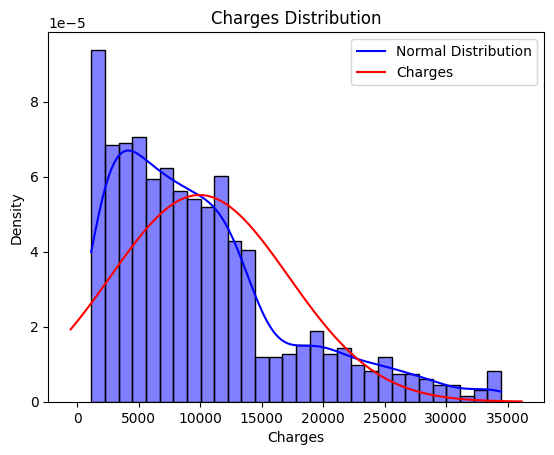

In [59]:

sns.histplot(df['charges'], kde=True, bins=30, stat="density", color="blue")
(mu, sigma) = st.norm.fit(df['charges'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', label='Normal Distribution')
plt.legend(['Normal Distribution', 'Charges'])
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Charges Distribution')
plt.show()

The target variable is right skewed which need log transfotmation

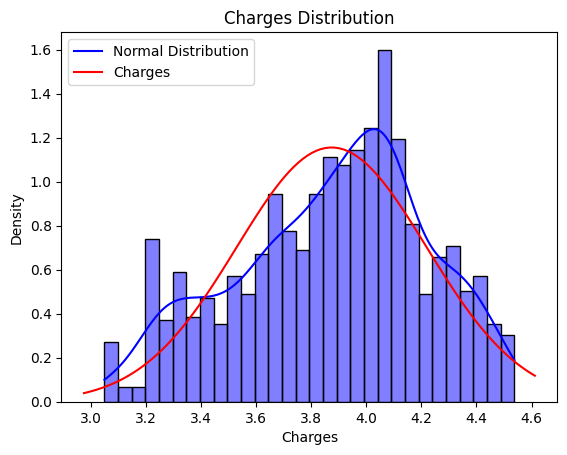

In [60]:
from sklearn.preprocessing import FunctionTransformer

# Define the FunctionTransformer
ft = FunctionTransformer(np.log10, validate=True)

# Apply the transformation
df['charges'] = ft.fit_transform(df[['charges']])

# Plot the distribution
sns.histplot(df['charges'], kde=True, bins=30, stat="density", color="blue")
(mu, sigma) = st.norm.fit(df['charges'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', label='Normal Distribution')
plt.legend(['Normal Distribution', 'Charges'])
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Charges Distribution')
plt.show()

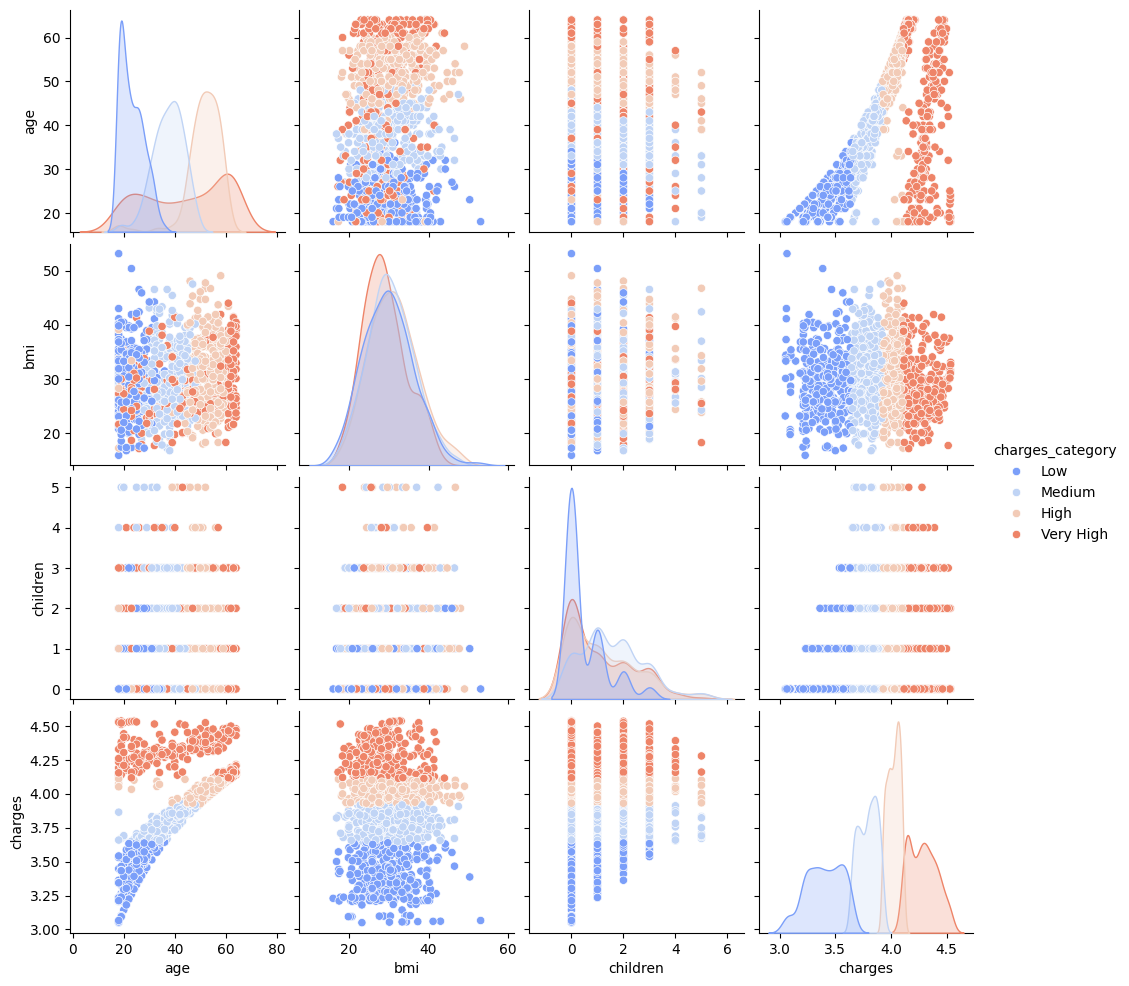

In [61]:
# Bin the 'charges' column into categories
df['charges_category'] = pd.qcut(df['charges'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create the pairplot
sns.pairplot(df, hue='charges_category', palette='coolwarm')
plt.show()

Pairplot shows data is linearly separble

Identify top features of the dataset


Text(0.5, 1.0, 'Correlation Matrix')

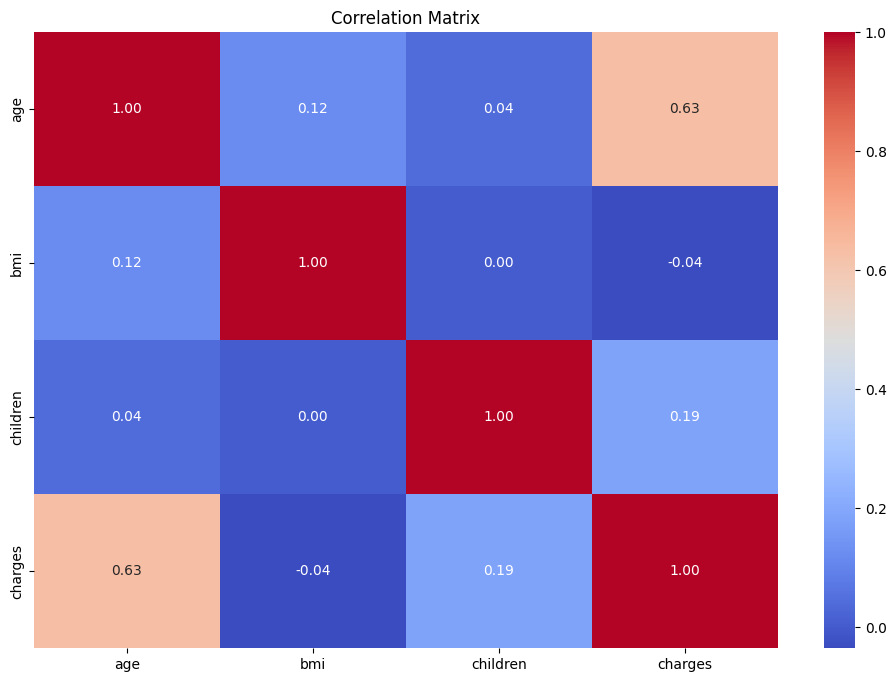

In [62]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Top Correlated Features with Charges')

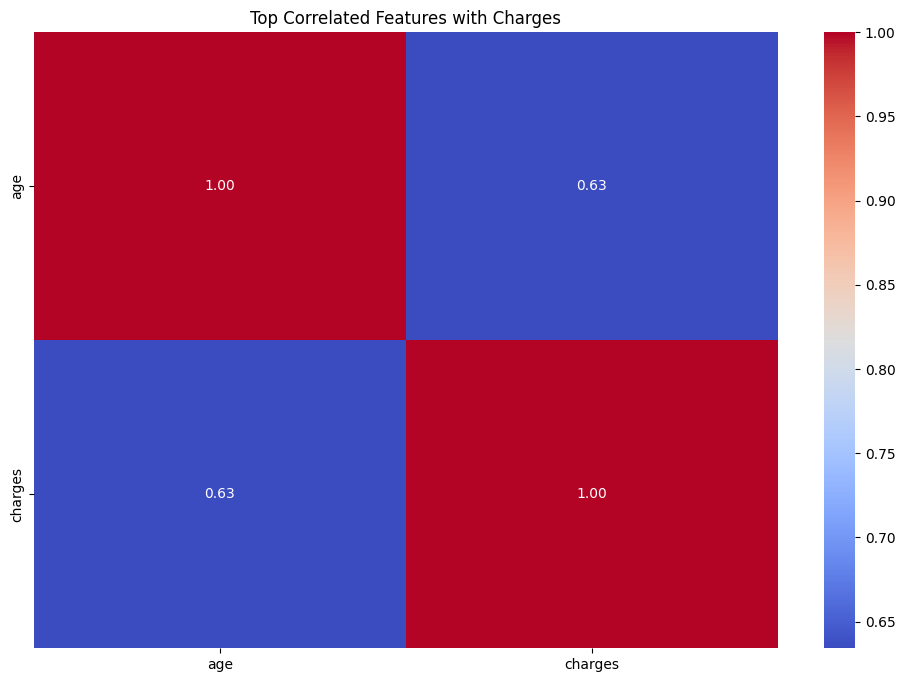

In [63]:
# filter variables with correlation > 0.5 or < -0.5
top_corr_features = corr.index[(abs(corr["charges"]) > 0.5) | (abs(corr["charges"]) < -0.5)]
plt.figure(figsize=(12, 8))
top_corr_features= numeric_df[top_corr_features]
sns.heatmap(top_corr_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features with Charges')

In [64]:
# Print the correlation values
print("Find most important features relative to target")
corr.sort_values(['charges'], ascending=False, inplace=True)
corr['charges']

Find most important features relative to target


charges     1.000000
age         0.634100
children    0.185324
bmi        -0.035437
Name: charges, dtype: float64

Encode Categorical data


In [65]:
# Ensure the 'df' variable is defined by executing the cell where it is loaded (CELL INDEX: 3)

# Scale data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_array = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=df.select_dtypes(include=['int64', 'float64']).columns)

# Check the scaled values
df_scaled.head()

,age,bmi,children,charges
0,-1.423338,-0.365157,-0.893931,1.022261
1,-1.494481,0.611462,-0.070139,-1.845989
2,-0.783050,0.483354,1.577444,-0.654819
3,-0.427334,-1.229473,-0.893931,1.354140
4,-0.498477,-0.202110,-0.893931,-0.831302


In [66]:
# Select features and target variable
X = df.drop(columns=['charges'])
y = df['charges']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor()),
    ('Support Vector Regressor', SVR()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Bagging', BaggingRegressor()),
    
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

In [67]:
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R^2 score
mean_r2_score = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Model:", name)
print("Cross-validation R^2 Score:", mean_r2_score)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print()

# Check if the current model has the best R^2 score
if r2 > best_accuracy:
    best_accuracy = r2
    best_model = pipeline

# Retrieve the best model
# Retrieve the best model
print("Best Model:", best_model)


Model: Bagging
Cross-validation R^2 Score: 0.9583629687218632
Mean Squared Error (MSE): 0.004971602032458151
Mean Absolute Error (MAE): 0.04569994409727639
R^2 Score: 0.9569198170805202

Best Model: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', BaggingRegressor())])


In [68]:
# Save model
# save the model
import pickle
# create folder to save the model if exists remove it
import os
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
pickle.dump(model, open('./saved_models/01_linear_regression.pkl', 'wb'))

In [69]:
# load the model
import pickle
model_load = pickle.load(open('./saved_models/01_linear_regression.pkl', 'rb'))

In [70]:
# predict values 
input_data = pd.DataFrame([{
	'age': 18,
	'sex': 'male',
	'bmi': 33.77,
	'children': 1,
	'smoker': 'no',
	'region': 'southeast',
	'charges_category': 'Low'
}])

# Use the best_model pipeline to make predictions
prediction = best_model.predict(input_data)
print("Prediction:", prediction)


Prediction: [3.23666972]


The best model for predicting medical insurance charges was Bagging Regressor, with an excellent test R² of 96.15%, indicating it explains most of the variance in the charges. The model generalizes well and is suitable for real-world prediction tasks.